In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Generating the Dataset for Testing

In [123]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data for x1, x2, x3
x1 = 2 * np.random.rand(1000, 1)
x2 = 3 * np.random.rand(1000, 1)
x3 = 4 * np.random.rand(1000, 1)
x4 = 5 * np.random.rand(1000, 1)

# Generate random noise
noise = np.random.randn(1000, 1) **4

# Generate y values with a polynomial relationship using x1, x2, x3
y = 2 + 3 * x1**2 + 2 * x2**4 + 1.5 * x3 + 4 * x4**2 + noise

# Create a DataFrame with multiple features
data = pd.DataFrame({
    'X1': x1.flatten(),
    'X2': x2.flatten(),
    'X3': x3.flatten(),
    'X4': x4.flatten(),
    'Y': y.flatten()
})

# Display the first few rows of the DataFrame
print(data.head())


         X1        X2        X3        X4           Y
0  0.749080  0.555399  1.046823  3.363515   53.813071
1  1.901429  1.625703  0.987915  3.983407   91.777854
2  1.463988  2.618838  3.625018  1.252339  114.348866
3  1.197317  2.196675  0.998185  3.124370   93.456522
4  0.312037  2.419683  1.087799  2.858730  105.216526


# EDA

<Axes: >

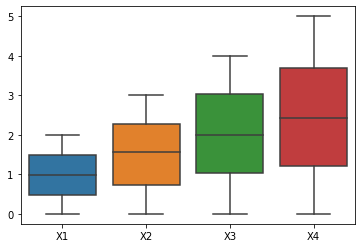

In [124]:
sns.boxplot(data.drop('Y', axis=1))

<Axes: >

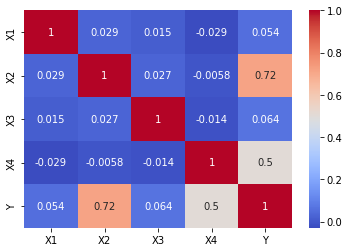

In [125]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

- The correlation heatmap shows a strong positive correlation between variables X2 and Y
- A weak correaltion is also Observed  between X4 and Y. 

But as we know there is an underlying pattern to the data, let's see if a Linear model can figure out the relationship

Let's examine the faetures and their relationship with Y!

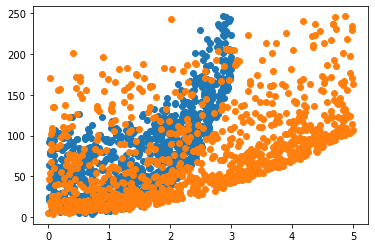

In [137]:
plt.scatter(data['X2'], data['Y'])
plt.scatter(data['X4'], data['Y'])

### The relationship seems to go in a curve and we definately know  that it is not linear.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Train Test Split, 70/30 split here

In [131]:
X = data.drop('Y', axis=1)
y = data['Y']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Lets just test it with Linear Regression and see the performance

R2 0.7676879934364671 :(


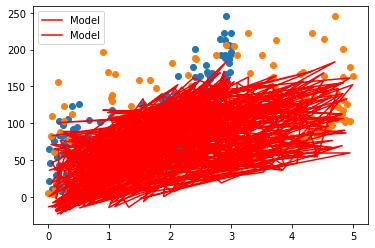

In [163]:
## Normal Linear Regression
normal_model =  LinearRegression()
normal_model.fit(X_train, y_train)
y_pred_l =  normal_model.predict(X_test)
print(f'R2 {normal_model.score(X_test, y_test)}', ':(')

plt.scatter(X_test['X2'], y_test)
plt.scatter(X_test['X4'], y_test)
plt.plot(X_test['X2'], y_pred_l, color='red', label='Model')
plt.plot(X_test['X4'], y_pred_l, color='red', label='Model')

plt.legend()
plt.show()

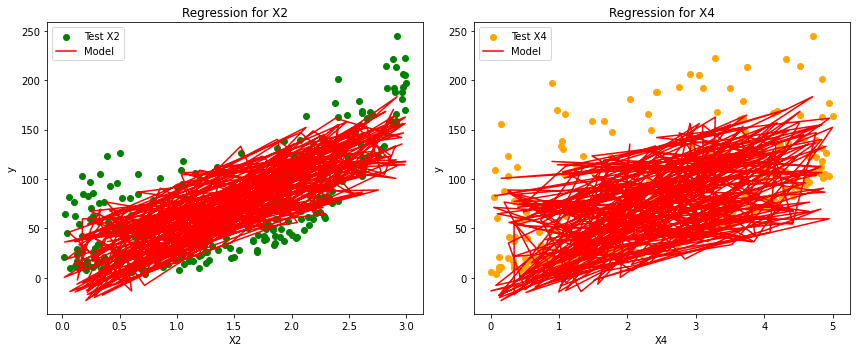

In [168]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot and regression model
axs[0].scatter(X_test['X2'], y_test, label='Test X2', color='green')
axs[0].plot(X_test['X2'], y_pred_l, color='red', label='Model')
axs[0].set_xlabel('X2')
axs[0].set_ylabel('y')
axs[0].set_title('Regression for X2')
axs[0].legend()

axs[1].scatter(X_test['X4'], y_test, label='Test X4', color='orange')
axs[1].plot(X_test['X4'], y_pred_l, color='red', label='Model')
axs[1].set_xlabel('X4')
axs[1].set_ylabel('y')
axs[1].set_title('Regression for X4')
axs[1].legend()

plt.tight_layout()
plt.show()


It is pretty evident that the Linear model is missing a lot of pattern from data

In [158]:
# Fit a polynomial regression model
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Transform the test set features
X_test_poly = poly_features.transform(X_test)

# Make predictions on the test set
y_pred = poly_model.predict(X_test_poly)
poly_model.score(X_train_poly, y_train)

0.966970719730428

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'For Test : MSE {mean_squared_error(y_test, y_pred)}, R2 {r2_score(y_test, y_pred)}', ':D')


For Test : MSE 142.61417777659958, R2 0.9478318743683654 :D


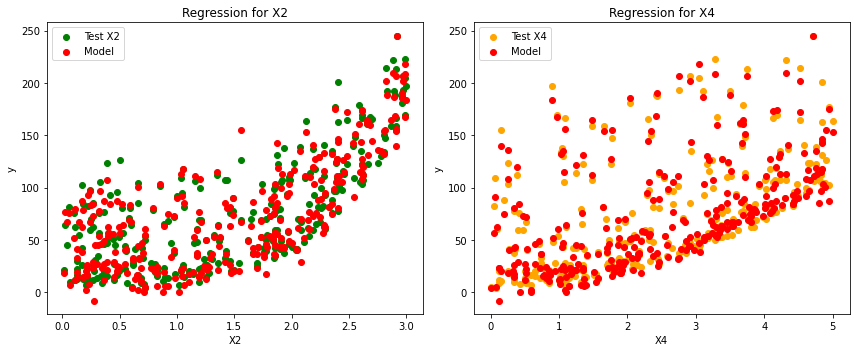

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot and regression model
axs[0].scatter(X_test['X2'], y_test, label='Test X2', color='green')
axs[0].scatter(X_test['X2'], y_pred, color='red', label='Model')
axs[0].set_xlabel('X2')
axs[0].set_ylabel('y')
axs[0].set_title('Regression for X2')
axs[0].legend()

axs[1].scatter(X_test['X4'], y_test, label='Test X4', color='orange')
axs[1].scatter(X_test['X4'], y_pred, color='red', label='Model')
axs[1].set_xlabel('X4')
axs[1].set_ylabel('y')
axs[1].set_title('Regression for X4')
axs[1].legend()

plt.tight_layout()
plt.show()


In [135]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [98]:
# Fit a polynomial regression model with Ridge regularization
alpha = 0.1  # Regularization parameter
poly_model_ridge = make_pipeline(PolynomialFeatures(degree=4), StandardScaler(), Ridge(alpha=alpha))
poly_model_ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = poly_model_ridge.predict(X_test)

# Evaluate the model
accuracy_ridge = poly_model_ridge.score(X_test, y_test)
print("Accuracy with Ridge regularization:", accuracy_ridge)


Accuracy with Ridge regularization: 0.965911786905487
